In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 
import tensorflow as tf

In [0]:
from tensorflow.keras import regularizers
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-05-12 19:07:08--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 2404:6800:4003:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-05-12 19:07:08 (157 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [0]:
model = Sequential()


In [0]:
model.add(Embedding(total_words,256,input_length=max_sequence_len-1))
    # Your Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))
# An LSTM Layer)
model.add(Dropout(0.2))
# A dropout layer)
model.add(LSTM(100))
# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))
# A Dense Layer)
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
# Pick a loss function and an optimizer)


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 10, 256)           822016    
_________________________________________________________________
bidirectional_7 (Bidirection (None, 10, 300)           488400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,789,787
Trainable params: 6,789,787
Non-trainable params: 0
____________________________________________

In [0]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 8s 16ms/step - loss: 6.9157 - accuracy: 0.0229
Epoch 2/100
484/484 [==============================] - 8s 16ms/step - loss: 6.5009 - accuracy: 0.0228
Epoch 3/100
484/484 [==============================] - 8s 16ms/step - loss: 6.4067 - accuracy: 0.0254
Epoch 4/100
484/484 [==============================] - 8s 16ms/step - loss: 6.2887 - accuracy: 0.0305
Epoch 5/100
484/484 [==============================] - 8s 16ms/step - loss: 6.1921 - accuracy: 0.0345
Epoch 6/100
484/484 [==============================] - 8s 16ms/step - loss: 6.1074 - accuracy: 0.0387
Epoch 7/100
484/484 [==============================] - 8s 16ms/step - loss: 6.0233 - accuracy: 0.0418
Epoch 8/100
484/484 [==============================] - 8s 16ms/step - loss: 5.9404 - accuracy: 0.0448
Epoch 9/100
484/484 [==============================] - 8s 16ms/step - loss: 5.8500 - accuracy: 0.0497
Epoch 10/100
484/484 [==============================] - 8s 16ms/step - loss: 5.755

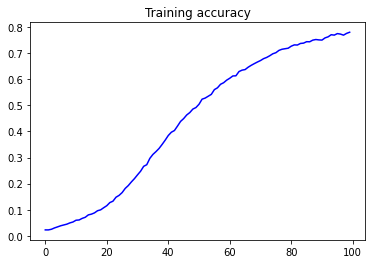

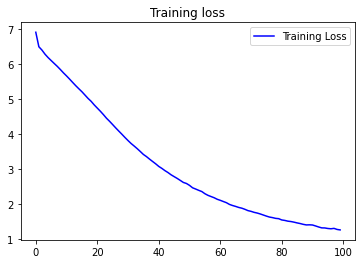

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [0]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi Wan Kenobi, you're my only hope some green thy store as memory joy dead did loving gay gems ' ' age cunning out cunning shadow cunning love thy name exchanged cunning art day time beauty's joy 'will' 'will' where things well did feel they thee knows her own thought ' canst not vex heaven to score joy bright time go new cunning wait to ' luck express'd did frame fled thee cunning might let your beauty's wealth ' ' show love cunning want of him for my pupil pen truth ' ' cunning love cunning love of your steel days some winter's fairest duty thought joy
